# TikTok Project

## Understand the business scenario and problem

TikTok users can report videos that they believe are claims, thereby violating the platform's terms of service. Because there are millions of TikTok videos created and viewed everyday, this means that many videos get reported &mdash; too many to be individually reviewed by a human moderator. 

Hence, TikTok wants to build a machine learning predictive model to help identify whether videos claims or opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims  will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, these videos would be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would be greatly assist in the effort to present human moderators with videos that are most likely to be violation of TikTok's terms of service.

## Plan

### TikTok dataset

In this dataset, there are 19,382 rows, 12 columns, and these variables:

Variable | Description|
-----|-----|
`#`|TikTok assigned number for video with claim/opinion|
`claim_status`|Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal beliefs or thoughts. A “claim” refers to information that is either unsourced or from an unverified source.|
`video_id`|Random identifying number assigned to video upon publication on TikTok|
`video_duration_sec`|How long the published video is measured in seconds|
`video_transcription_test`|Transcribed text of the words spoken in the published video|
`verified_status`|Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified” |
`author_ban_status`|Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned” |
`video_view_count`|The total number of times the published video has been viewed |
`video_like_count`|The total number of times the published video has been liked by other users |
`video_share_count`|The total number of times the published video has been shared by other users |
`video_download_count`|The total number of times the published video has been downloaded by other users |
`video_comment_count`|The total number of comments on the published video |

### Imports

* Import packages
* Load dataset

In [1]:
# import packages

# for data manipulation

import pandas as pd
import numpy as np

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all of the columns and decimal places in dataframes

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# for data preprocessing

from sklearn.feature_extraction.text import CountVectorizer

# for data modeling

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# for metrics and helpful functions

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report

# for saving models
import pickle
import os

In [2]:
# load dataset into a dataframe
data = pd.read_csv(r'/Google Advance Data Analytic/Course 6_ML/Module 5/TikTok/tiktok_dataset.csv')

data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0000,19425.0000,241.0000,1.0000,0.0000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0000,77355.0000,19034.0000,1161.0000,684.0000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0000,97690.0000,2858.0000,833.0000,329.0000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0000,239954.0000,34812.0000,1234.0000,584.0000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0000,34987.0000,4110.0000,547.0000,152.0000


## Analyze

### Exploratory Data Analysis

* Understand variables
* Clean the dataset

In [3]:
# Basic information about the the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


> There are 19382 TikTok videos published with 12 aspects of the individual video are recorded in the dataset. This dataset contains **missing values**, and has 5 float variables, 3 interger variables and 4 object variables.

In [4]:
# Descriptive statistics about the data

data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.0000,19084,19382.0000,19382.0000,19084,19382,19382,19084.0000,19084.0000,19084.0000,19084.0000,19084.0000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.5000,NaN,5627454067.3391,32.4217,NaN,NaN,NaN,254708.5587,84304.6360,16735.2483,1049.4296,349.3121
std,5595.2458,NaN,2536440464.1694,16.2300,NaN,NaN,NaN,322893.2808,133420.5468,32036.1744,2004.2999,799.6389
min,1.0000,NaN,1234959018.0000,5.0000,NaN,NaN,NaN,20.0000,0.0000,0.0000,0.0000,0.0000
25%,4846.2500,NaN,3430416807.2500,18.0000,NaN,NaN,NaN,4942.5000,810.7500,115.0000,7.0000,1.0000
50%,9691.5000,NaN,5618663579.0000,32.0000,NaN,NaN,NaN,9954.5000,3403.5000,717.0000,46.0000,9.0000
75%,14536.7500,NaN,7843960211.2500,47.0000,NaN,NaN,NaN,504327.0000,125020.0000,18222.0000,1156.2500,292.0000


> `claim_status`: There are 2 unique classes in this variable with 'claim' being the most frequent class observed in this variable. <br>
`video_duration_sec`: This variable seems to be normally distributed since mean and median (50%) have similar values and no outliers since values of 75% and max are relatively close. <br>
`video_transcription_test`: There are 19012 unique classes in this variable. <br>
`verified_status`: There are 2 unique classes in this variable with 'not verified' being the most frequent class observed in this variable. <br>
`author_ban_status`: There are 3 unique classes in this variable with 'active' being the most frequent class observed in this variable. <br>
`video_view_count`: The variable seems to have **right skewed distribution**  since mean and median values are different.<br>
`video_like_count`: The variable seems to have **right skewed distribution** with outliers since max values are relatively much higher than 75% value. <br>
`video_share_count`: The variable seems to have **right skewed distribution** with outliers since max values are relatively much higher than 75% value. <br>
`video_download_count`: The variable seems to have **right skewed distribution** with outliers since max values are relatively much higher than 75% value.<br>
`video_comment_count`: The variable seems to have **right skewed distribution** with outliers since max values are relatively much higher than 75% value.

In [5]:
#check for any missing values in the data

data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [6]:
# percentage of missing values over the overall total values in the data

round(data.isna().any(axis=1).sum()/len(data)*100, 2)

1.54

> There are 298 missing values in the dataset which is 1.54% of the total videos published on TikTok. <br>

> Since the missing values are less than 5% of the data, we will subsequently remove this missing values from our dataset.

In [7]:
# drop rows with missing values

data = data.dropna(axis=0)

#check that there is no missing values now 

data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [8]:
# check for duplicates

data.duplicated().sum()

0

> There are no duplicated data in this dataset.

### Data Visualization

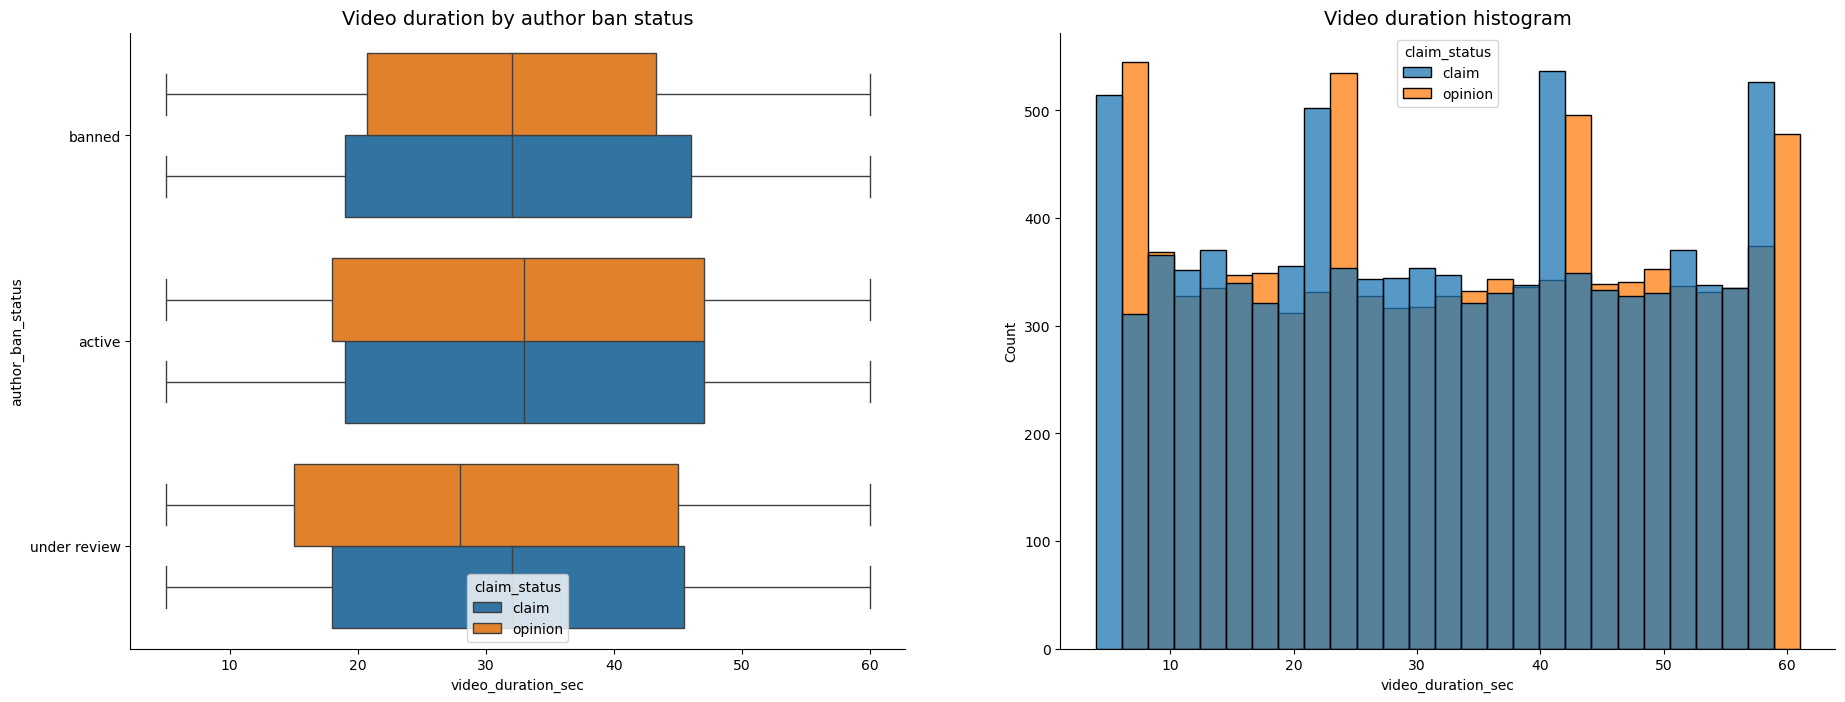

In [9]:
# boxplot showing 'video_duration_sec' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_duration_sec', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video duration by author ban status', fontsize='14')

# histogram showing distribution of 'video_duration_sec', comparing videos claims versus opinions

sns.histplot(data=data, x='video_duration_sec', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video duration histogram', fontsize='14')

plt.show()

> Based on the boxplot, the video durations are similar between videos with claim and opinions in all classes of the author ban status, suggesting that `video_duration_sec` may not be a strong predictor of whether video contains claims or opinions. Based on histogram, video duration is uniformly distributed.

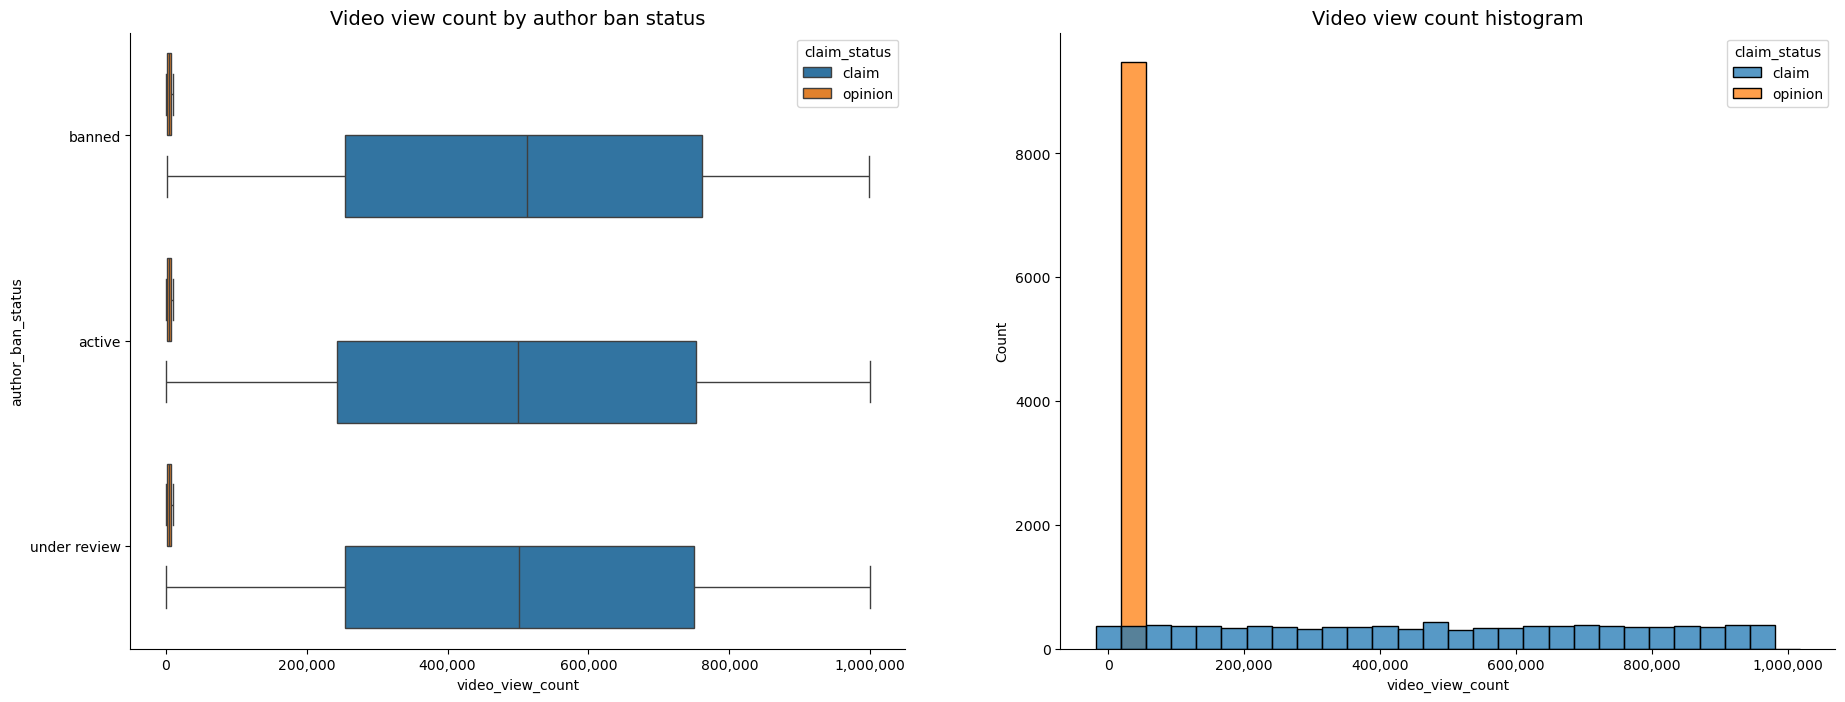

In [10]:
from matplotlib.ticker import FuncFormatter

#function to format large values without scientific notation

def large_value_formatter(x, pos):
    return f'{int(x):,}'

# boxplot showing 'video_view_count' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_view_count', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video view count by author ban status', fontsize='14')
ax[0].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

# histogram showing distribution of 'video_view_count', comparing videos claims versus opinions

sns.histplot(data=data, x='video_view_count', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video view count histogram', fontsize='14')
ax[1].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

plt.show()

In [11]:
# mean and median video view counts in videos with claims and videos with opinions

data.groupby('claim_status')['video_view_count'].agg({'mean','median'})

,median,mean
claim_status,,
claim,501555.0000,501029.4527
opinion,4953.0000,4956.4322


> Based on the boxplot and histogram, video view counts are relatively much higher in videos with claims compared to videos with opinions in all classes of author ban status. This is observed in all three classes of the author ban status. The mean video view count of claim videos is around 50,0000 while mean video view count of opinion videos is around 5000. Hence, `video_view_count` may be a predictor of video claim status.

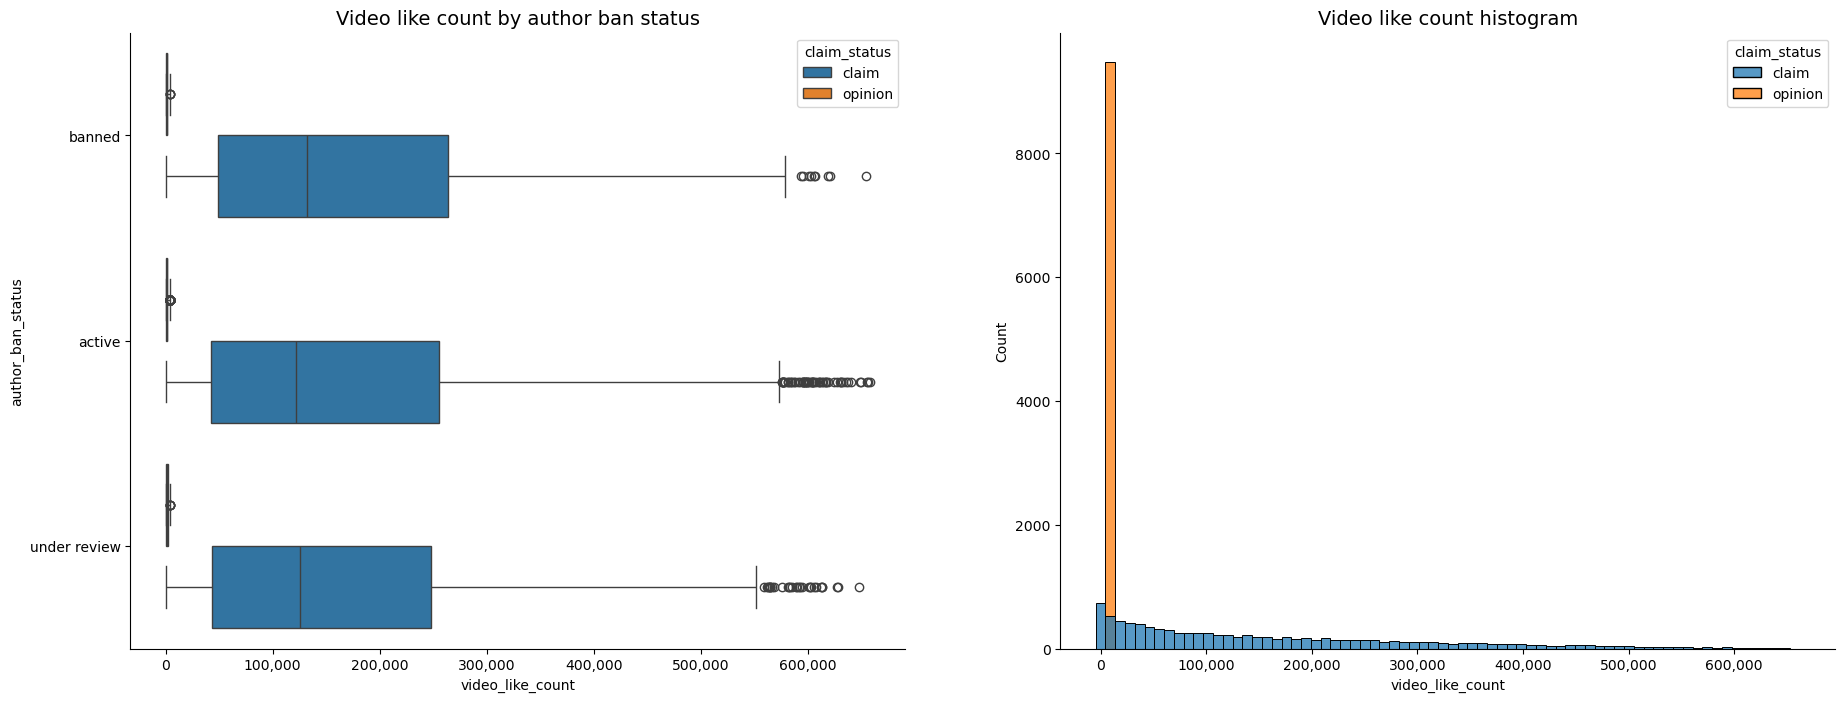

In [12]:
# boxplot showing 'video_like_count' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_like_count', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video like count by author ban status', fontsize='14')
ax[0].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

# histogram showing distribution of 'video_view_count', comparing videos claims versus opinions

sns.histplot(data=data, x='video_like_count', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video like count histogram', fontsize='14')
ax[1].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

plt.show()

In [13]:
# mean and median video like counts in videos with claims and videos with opinions

data.groupby('claim_status')['video_like_count'].agg({'mean','median'})

,median,mean
claim_status,,
claim,123649.0000,166373.3312
opinion,823.0000,1092.7298


> Based on the boxplot and histogram, video like counts in claim videos are relatively higher than those in opinion videos. This is observed in all three classes of the author ban status. The median like count in claim video is around 12,0000 likes while the median like count in opinion video is around 800 likes. Hence, `video_like_count` may be a strong predictor of video claim status.

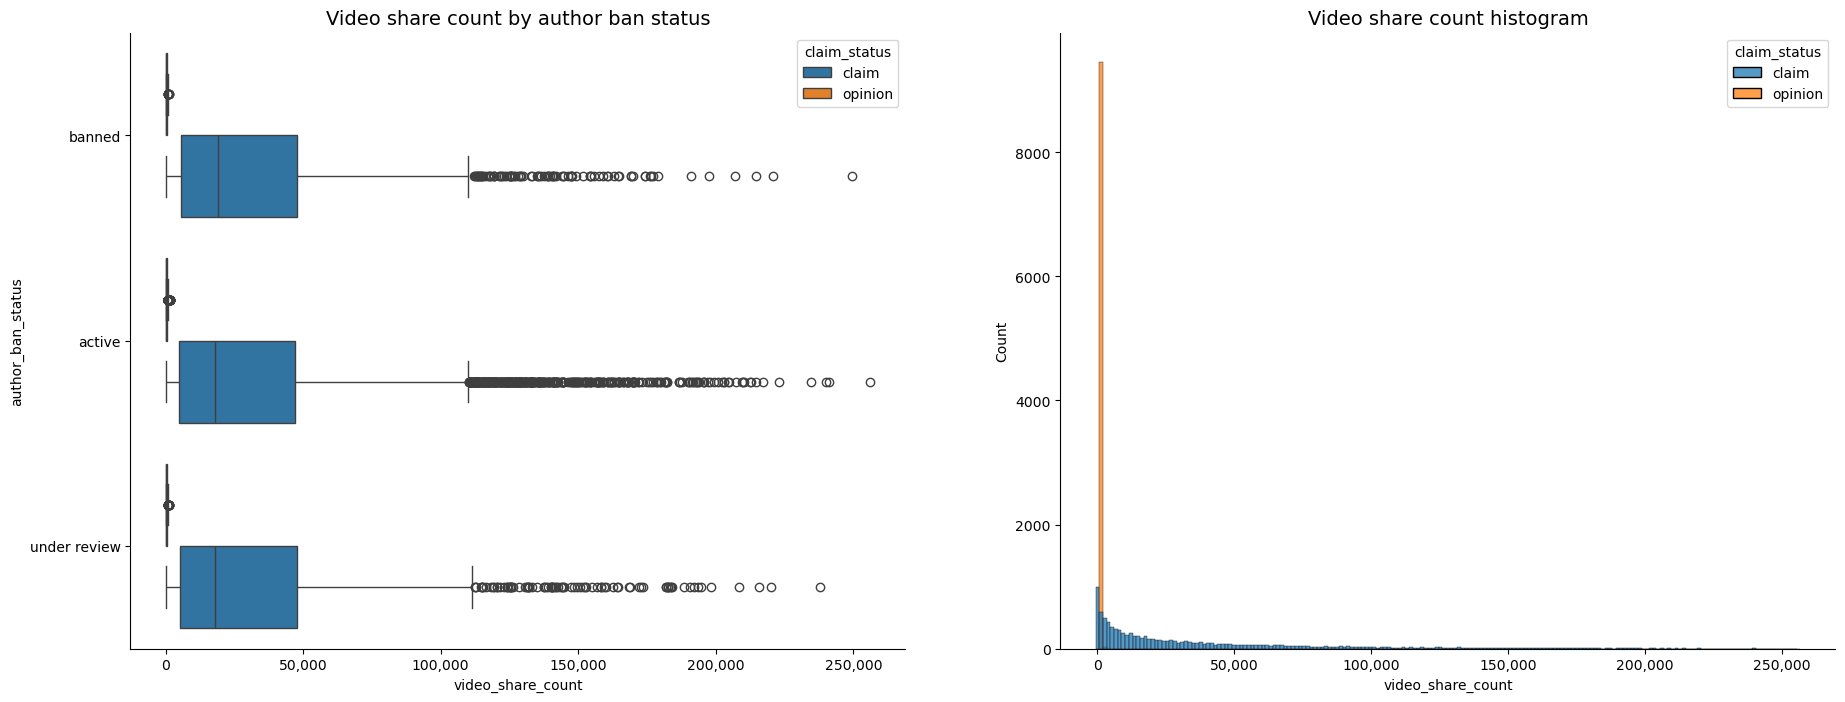

In [14]:
# boxplot showing 'video_share_count' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_share_count', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video share count by author ban status', fontsize='14')
ax[0].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

# histogram showing distribution of 'video_view_count', comparing videos claims versus opinions

sns.histplot(data=data, x='video_share_count', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video share count histogram', fontsize='14')
ax[1].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

plt.show()

In [15]:
# mean and median video share counts in videos with claims and videos with opinions

data.groupby('claim_status')['video_share_count'].agg({'mean','median'})

,median,mean
claim_status,,
claim,17997.5000,33026.4162
opinion,121.0000,217.1456


> Based on the boxplot and histogram, video share counts are relatively much higher in claim videos (median of around 20,000) than those in opinion videos (median of around 120), highlighting that `video_share_count` may be a predictor of video claim status. This similar trend is observed in all three classes of author ban status.

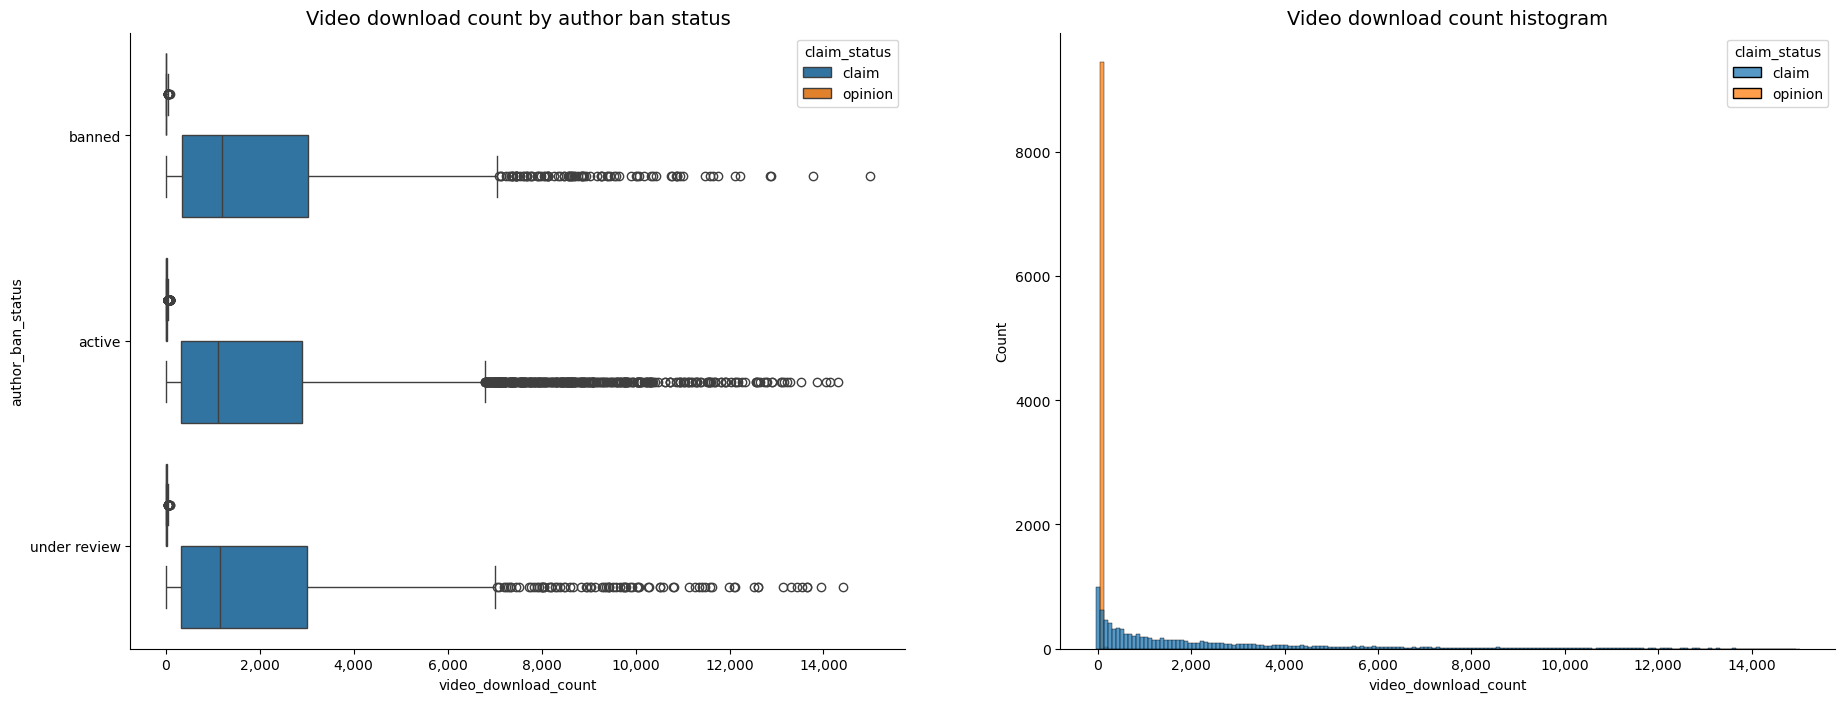

In [16]:
# boxplot showing 'video_download_count' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_download_count', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video download count by author ban status', fontsize='14')
ax[0].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

# histogram showing distribution of 'video_view_count', comparing videos claims versus opinions

sns.histplot(data=data, x='video_download_count', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video download count histogram', fontsize='14')
ax[1].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

plt.show()

In [17]:
# mean and median video download counts in videos with claims and videos with opinions

data.groupby('claim_status')['video_download_count'].agg({'mean','median'})

,median,mean
claim_status,,
claim,1139.5000,2070.9522
opinion,7.0000,13.6773


> Based on boxplot and histogram, the video download counts are relatively higher in claim videos (median of around 1100 downloads) compared to those in opinion videos (median of around 7 downloads), suggesting that `video_download_count` may be a predictor of video claim status. This trend is also observed in all three classes in author ban status.

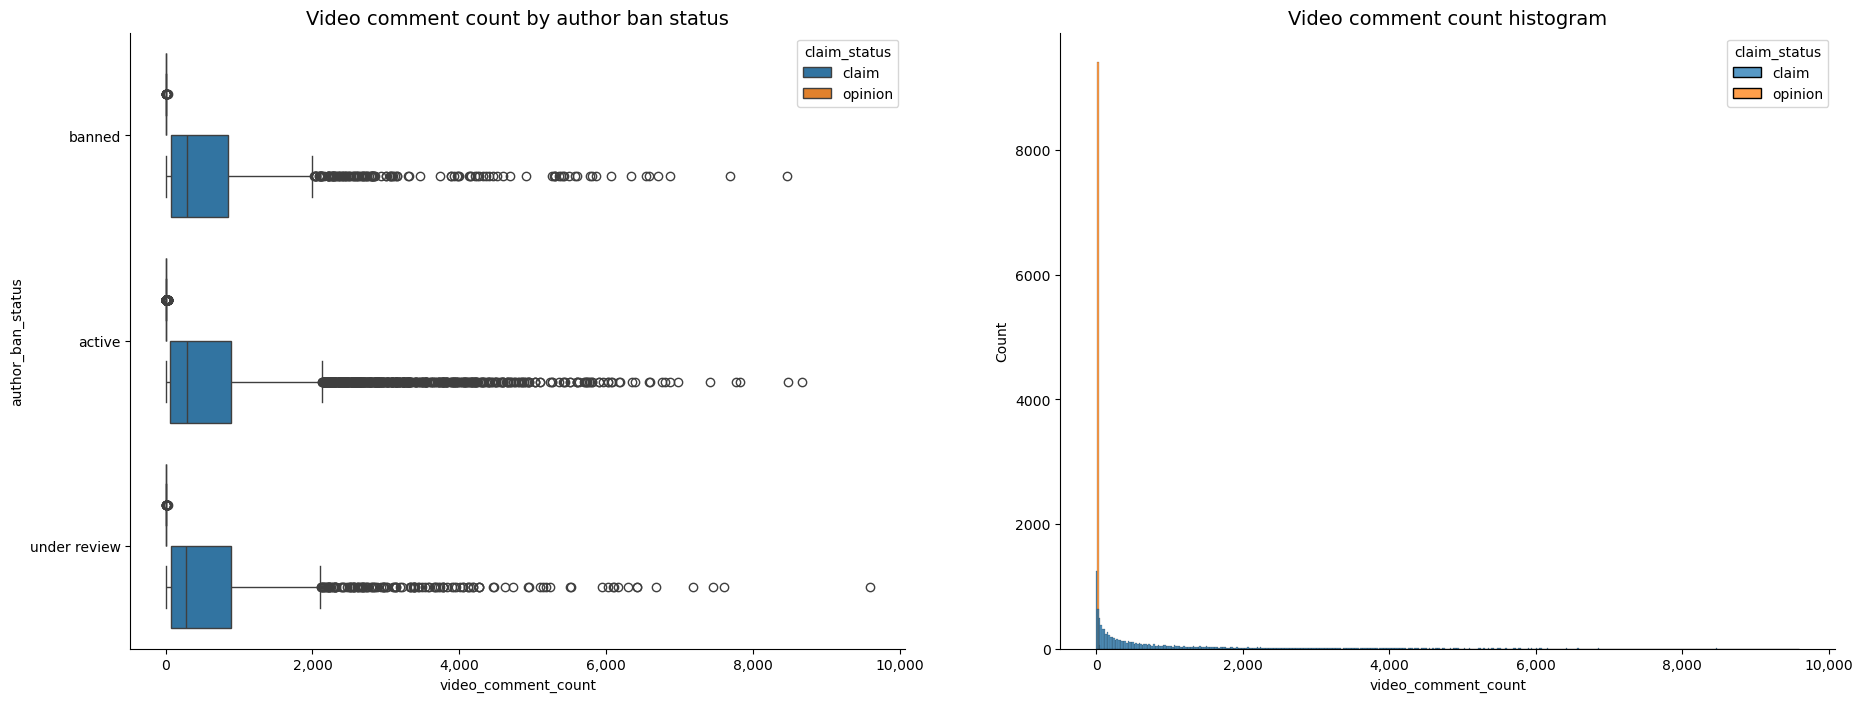

In [18]:
# boxplot showing 'video_comment_count' distributions for 'author_ban_status' comparing video with claims versus opinions

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data, x='video_comment_count', y='author_ban_status', hue='claim_status', orient ='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Video comment count by author ban status', fontsize='14')
ax[0].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

# histogram showing distribution of 'video_view_count', comparing videos claims versus opinions

sns.histplot(data=data, x='video_comment_count', hue='claim_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Video comment count histogram', fontsize='14')
ax[1].xaxis.set_major_formatter(FuncFormatter(large_value_formatter))

plt.show()

In [19]:
# mean and median video comment counts in videos with claims and videos with opinions

data.groupby('claim_status')['video_comment_count'].agg({'mean','median'})

,median,mean
claim_status,,
claim,286.0000,691.1649
opinion,1.0000,2.6974


> Based on the boxplot and histogram, video comment counts are much higher in claim videos (median of aroound 300 comments) than those in opinion videos (median of 1 comments), suggesting that `video_comment_count` may be a predictor of video claim status. This trend is observed in all three classes of the author ban status.

<Figure size 2200x800 with 0 Axes>

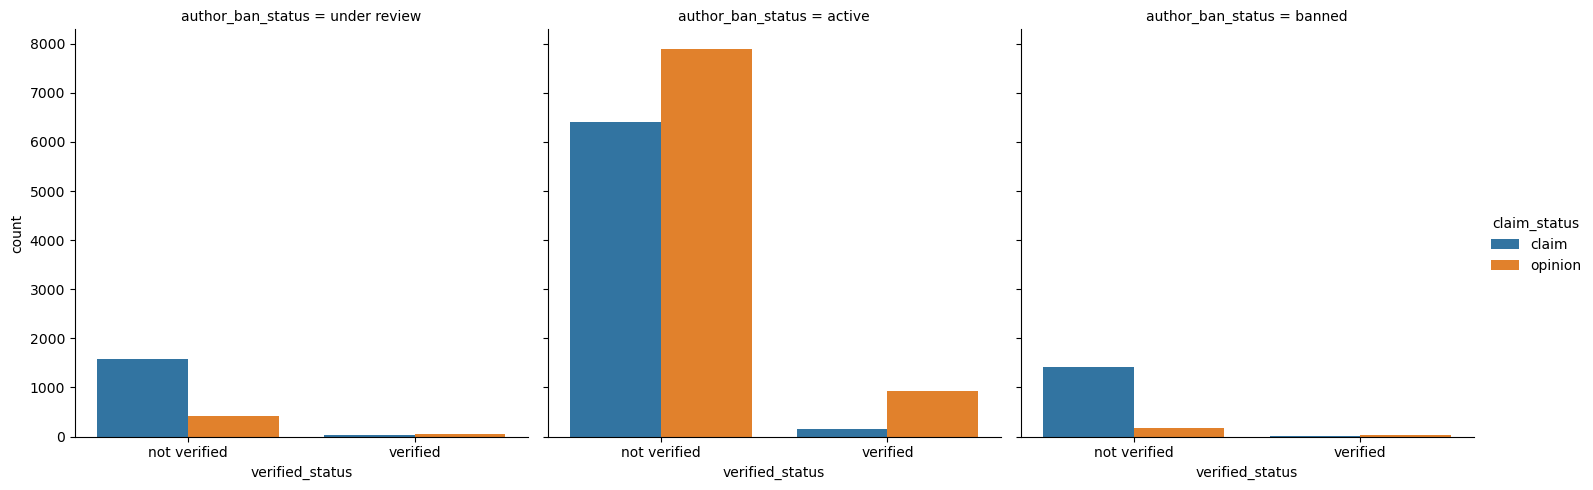

In [20]:
# count plots showing number of verified users versus non verified users based on video claim status, comparing across all
# three class of author ban status
plt.figure(figsize=(22,8))

sns.catplot(data=data, x='verified_status', hue='claim_status', col='author_ban_status', kind='count')
plt.ylabel('Number of users', fontsize='14')

plt.show()

> Among three classes of author ban status, there are relatively more active users than those under review or banned users. Within active users, there are more opinion videos than claim videos in both not verified and verified users. 

> In all three classes of author ban status, the number of not verified users are higher than those in verified users. Interestingly, under review and banned users, who are also not verified, tend to post claim videos more than opinion videos.

> Hence, when the user is under review or banned and not verified, the user may be more likely to post claim videos, suggesting that `author_ban_status` and `verified_status` may be predictors of video claim status.

### Insights

1. Claim videos tend to receive more views, likes, shares, downloads, and comments compared to opinion videos.
2. When users are under review or banned and not verified, users may be more likely to post claim video. <br>

Hence, features of the video, user verification status and author ban status may be good predictors of whether a video contains claims or opinions.

## Construct

#### Identify the target variable and type of prediction task

Since the goal is to predict whether a video contains claims or opinions, we will use `claim_status` variable as our target variable for building prediction model. Since this variable is a categorical outcome, this task involves classification, specifically binary classification since variable is either 'claim' or 'opinion'.

#### Identify the types of models most appropriate for this task

Since the variable is categorical, we could either build Logistic Regression model or ensemble-based Machine Learning model.

In [21]:
# check for the class balance in the `claim_status`

round(data['claim_status'].value_counts(normalize=True),2)

claim_status
claim     0.5000
opinion   0.5000
Name: proportion, dtype: float64

> We checked for the class balance in the `claim_status` as class imbalance could introduce model's bias in predictions. Since both 'claim' and 'opinion' classes are similar (50% of dataset for both), we do not need to resample the data to balance the classes for this variable.

### Logistic Regression Model

Assumptions to be checked:

1. Observations are independent of each other (Yes, since each video in the dataset uploaded separately)
2. No extreme outliers (We will check for the outliers and replace the those outliers with upper threshold)
3. No severe multicollinearity among predictor variables (We will check using heatmap and drop variables that are highly correlated)
4. Linear relationship between each predictor variable and the logit of the target variable (We can only check after building the Logistic Regression Model)

#### Feature engineering

Extract the length (character count) of each `video_transcription_text` and add this to the dataframe as a new column called `text_length` so that it can be used as a feature in the model.

In [22]:
data['text_length'] = data['video_transcription_text'].str.len()

data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0000,19425.0000,241.0000,1.0000,0.0000,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0000,77355.0000,19034.0000,1161.0000,684.0000,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0000,97690.0000,2858.0000,833.0000,329.0000,137


#### Checking for outliers

In [23]:
# copy 'data' dataframe into df in order to keep the orginial dataset

df = data.copy()

def check_outliers(col_name:str,df):
    ''' 
    check_outliers function change all the outliers values below lower limit or above upper limit into lower limit
    or upper limit values. If a variable has no outliers, it will return that the variable has no outliers.
    
    col_name : name of the column in string
    df : data frame name
    '''
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)
    
    IQR = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR
    
    if (df[col_name]>upper_limit).any() | (df[col_name]<lower_limit).any():
        df.loc[df[col_name]>upper_limit, col_name] = upper_limit
        df.loc[df[col_name]<lower_limit, col_name] = lower_limit
    else:
        print(f'{col_name} has no outliers')
        
check_outliers('video_duration_sec',df)

video_duration_sec has no outliers


In [24]:
# create list of column names to check for the outliers
columns =  ['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']

# create a loop for the columns list that will pass through check_outliers function

for col in columns:
    check_outliers(col, df)

video_view_count has no outliers


In [25]:
# inspect whether outliers have been corrected

df.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
count,19084.0000,19084,19084.0000,19084.0000,19084,19084,19084,19084.0000,19084.0000,19084.0000,19084.0000,19084.0000,19084.0000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,17884,15383,NaN,NaN,NaN,NaN,NaN,NaN
mean,9542.5000,NaN,5624839917.8735,32.4238,NaN,NaN,NaN,254708.5587,74323.5386,11246.9101,713.4448,181.0235,89.0935
std,5509.2206,NaN,2537030180.2586,16.2265,NaN,NaN,NaN,322893.2808,107103.5552,16573.5335,1049.8814,272.0848,20.6821
min,1.0000,NaN,1234959018.0000,5.0000,NaN,NaN,NaN,20.0000,0.0000,0.0000,0.0000,0.0000,31.0000
25%,4771.7500,NaN,3425100251.2500,18.0000,NaN,NaN,NaN,4942.5000,810.7500,115.0000,7.0000,1.0000,75.0000
50%,9542.5000,NaN,5609500370.0000,32.0000,NaN,NaN,NaN,9954.5000,3403.5000,717.0000,46.0000,9.0000,87.0000
75%,14313.2500,NaN,7840823300.5000,47.0000,NaN,NaN,NaN,504327.0000,125020.0000,18222.0000,1156.2500,292.0000,101.0000


#### Checking for multicollinearity

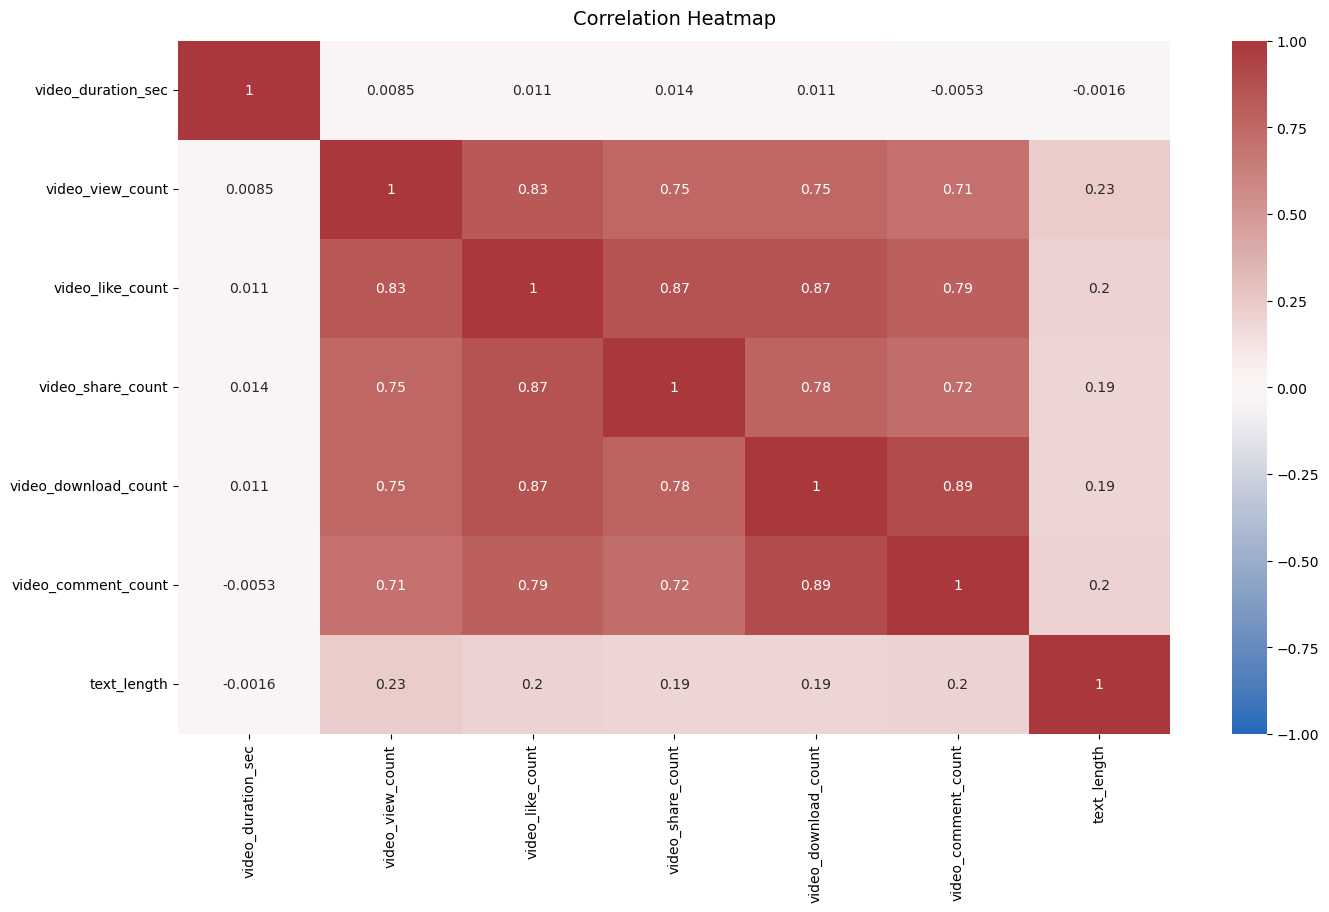

In [26]:
# A heatmap to visualize how correlated variables are

plt.figure(figsize=(16,9))

heatmap = sns.heatmap(df[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count','text_length']].corr(), vmin=-1, vmax=1, 
                      annot=True, cmap=sns.color_palette('vlag', as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

plt.show()

> The above heatmap shows that the following pairs of variables are strongly correlated: `video_share_count` vs `video_like_count` and `video_download_count` vs `video_comment_count`. <br>
Since logistic regression assumes no severe multicollinearity among the features, we will exclude `video_share_count` and `video_comment_count` from our logistic regression model.

#### Encoding variables

In [27]:
# check data type

df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_length                   int64
dtype: object

In [28]:
# encode target variable

df['claim_status2'] = df['claim_status'].map({'claim':1, 'opinion':0})

# Dummy encode 'verified_status' and 'author_ban_status'

df = pd.get_dummies(df, columns=['verified_status','author_ban_status'], drop_first=True)

df.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status2,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,343296.0000,19425.0000,241.0000,1.0000,0.0000,97,1,False,False,True
1,2,claim,4014381136,32,someone shared with me that there are more mic...,140877.0000,77355.0000,19034.0000,1161.0000,684.0000,107,1,False,False,False
2,3,claim,9859838091,31,someone shared with me that american industria...,902185.0000,97690.0000,2858.0000,833.0000,329.0000,137,1,False,False,False


#### Split the data

In [29]:
# Isolate target variable

y = df['claim_status2']

In [30]:
# Isolate features to be included in the model

X = df.drop(['#','claim_status','claim_status2','video_id','video_transcription_text',
             'video_share_count','video_comment_count'], axis=1)

X.head(3)

,video_duration_sec,video_view_count,video_like_count,video_download_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0000,19425.0000,1.0000,97,False,False,True
1,32,140877.0000,77355.0000,1161.0000,107,False,False,False
2,31,902185.0000,97690.0000,833.0000,137,False,False,False


In [31]:
# split the X and y into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

# inspect whether X and y are split into correct proportions

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15267, 8), (3817, 8), (15267,), (3817,))

In [32]:
# Construct a logistic regression model and fit it to the training dataset

log_reg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [33]:
# Use the logistic regression model to predict on the test set

lg_pred = log_reg.predict(X_test)

lg_pred

array([1, 0, 1, ..., 0, 0, 0])

#### Visualize logistic regression model results 

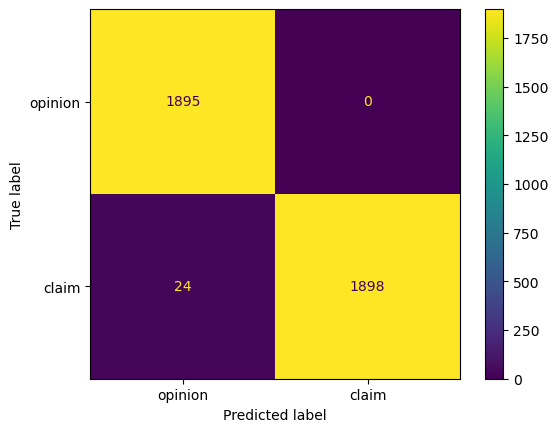

In [34]:
# compute values for the confusion matrix

cm = confusion_matrix(y_test, lg_pred, labels=log_reg.classes_)

# Create display of confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['opinion','claim'])

# Plot confusion matrix

disp.plot(values_format='')

# Display plot 

plt.show()

The upper-left quadrant displays the number of true negatives: the number of videos with opinions that the model accurately classified as so. 

The upper-right quadrant displays the number of false positives: the number of videos with opinions that the model misclassified as videos with claims.

The lower-left quadrant displays the number of false negatives: the number of videos with claims that the model misclassified as videos with opinions.

The lower-right quadrant displays the number of true negatives: the number of videos with claims the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [35]:
# Create a classification report for the logistic regression model

result_table = pd.DataFrame({'Model':['Logistic Reg'],
                            'Accuracy': [accuracy_score(y_test,lg_pred)],
                            'F1':[f1_score(y_test, lg_pred)],
                            'Precision':[precision_score(y_test, lg_pred)],
                            'Recall':[recall_score(y_test, lg_pred)],
                            })

result_table

,Model,Accuracy,F1,Precision,Recall
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875


The table shows that logistic regression model achieved an accuracy of 99.37%, suggesting that the model is able to accurately classify 99.37% of the uploaded videos as either containing opinions or claims. The model is able to achieve a precision of 100%, meaning that 100% of all the model classification of claim videos are indeed videos containing claims. The model is also able to identify 98.75% of claim videos in the test set as seen in the recall score. This high recall score is essential as we want our model to identify as many videos with claims as claim videos so that these videos can be further reviewed by human moderators.

#### Interpret model coefficients

In [36]:
# Get the feature names from the model and model coefficients (which represent log_odds ratios)
# Place into a DataFrame for readability

lg_coefs = pd.DataFrame(data={'Feature Name':log_reg.feature_names_in_,'Model Coefficient': log_reg.coef_[0]})

lg_coefs['Odd Ratio of Coefficient'] = np.exp(lg_coefs['Model Coefficient'])

lg_coefs.sort_values(by='Odd Ratio of Coefficient', ascending=False)

,Feature Name,Model Coefficient,Odd Ratio of Coefficient
6,author_ban_status_banned,1.1803,3.2555
7,author_ban_status_under review,0.7497,2.1163
4,text_length,0.0252,1.0255
0,video_duration_sec,0.0132,1.0132
2,video_like_count,0.0005,1.0005
1,video_view_count,0.0004,1.0004
3,video_download_count,-0.0015,0.9985
5,verified_status_verified,-2.9533,0.0522


Based on the table above, it seems that `author_ban_status` and `verified_status` have most influence on the likelihood of video containing claims. The likelihood of video containing claims increases when the user is banned or under review compared to active user, while the likelihood decreases when the user is verified. Hence, when the user is not verified and either banned or under review, the likelihood of video containing claims increases.

### Ensemble Learning-based Models

#### Tokenize text column

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm using `CountVectorizer` that works by splitting text into n-grams, which are groups of n consecutive words.

In [37]:
# set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts

count_vec = CountVectorizer(ngram_range=(2,3),
                            max_features=15,
                            stop_words='english')

count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [38]:
# Extract numerical features from 'video_transcription_text' in the data 

count_data = count_vec.fit_transform(data['video_transcription_text']).toarray()

count_data.shape

(19084, 15)

In [39]:
# place the numerical representation of 'video_transcription_test' into the data

count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

count_df.head(3)

,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Concatenate 'data' and 'count_df' to form the final dataframe 

data_final = pd.concat([data.drop(['video_transcription_text'],axis=1).reset_index(drop=True), count_df], axis=1)

data_final.head(3)

,#,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,1,claim,7017666017,59,not verified,under review,343296.0000,19425.0000,241.0000,1.0000,0.0000,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,claim,4014381136,32,not verified,active,140877.0000,77355.0000,19034.0000,1161.0000,684.0000,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,claim,9859838091,31,not verified,active,902185.0000,97690.0000,2858.0000,833.0000,329.0000,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Encoding variables for ensemble-based models

In [41]:
# encode target variable

df_final = data_final.copy()

df_final['claim_status'] = df_final['claim_status'].map({'claim':1, 'opinion':0})

# dummy encode 'verified_status' and 'author_ban_status'

df_final = pd.get_dummies(df_final, columns=['verified_status','author_ban_status'], drop_first=True)

df_final.head(3)

,#,claim_status,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,1,7017666017,59,343296.0000,19425.0000,241.0000,1.0000,0.0000,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
1,2,1,4014381136,32,140877.0000,77355.0000,19034.0000,1161.0000,684.0000,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
2,3,1,9859838091,31,902185.0000,97690.0000,2858.0000,833.0000,329.0000,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False


#### Split the data

In [42]:
# Isolate target variable

y_en = df_final['claim_status']

# Isolate features to be included in the model

X_en = df_final.drop(['#','claim_status','video_id'], axis=1).reset_index(drop=True)

X_en.head(3)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0000,19425.0000,241.0000,1.0000,0.0000,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
1,32,140877.0000,77355.0000,19034.0000,1161.0000,684.0000,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
2,31,902185.0000,97690.0000,2858.0000,833.0000,329.0000,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False


In [43]:
# split X_en and y_en into training and test set

X_tr, X_test, y_tr, y_test = train_test_split(X_en, y_en, random_state=42, test_size=0.20, stratify=y_en)

# split X_tr and y_tr into training and validation set

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=0, test_size=0.25, stratify=y_tr)

In [44]:
# validate whether the data spliting is done correctly

for x in [X_train,X_val,X_test]:
    print (x.shape)

(11450, 25)
(3817, 25)
(3817, 25)


#### Build a random forest model

In [45]:
# instantiate  the random forest classifier

rf = RandomForestClassifier(random_state=42)

# create a dictionary of hyperparameters to tune

rf_params = {'max_depth':[5, 7, None],
            'max_features':[0.3, 0.6],
            'max_samples':[0.5, 0.8],
            'min_samples_leaf':[1,2],
            'min_samples_split':[2,3],
            'n_estimators':[50, 100, 200],
            }
# define a dictionary of scoring metrics to capture

scoring = {'accuracy','f1','precision','recall'}

# instantiate the GridSearchCV object

rf_cv = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [46]:
%%time
# fit the classifier with X_train and y_train dataset

#rf_cv.fit(X_train, y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [47]:
# folder path where the fitted model will be saved at

path = '/Users/salai/Library/CloudStorage/OneDrive-Personal/Desktop/Google Advance Data Analytic/Porfolio Projects/TikTok models/'

# load packages needed to save those fitted models

import pickle
import os

In [48]:
def save_model(path, fit_model, model_name:str):
    '''
    In:
        path: path of folder where the fitted model will be save
        fit_model: model that you want to pickle
        model_name: Name for the saved model file
        
    Out: A call to pickle the model in the folder indicated
    '''
    # Ensure the directory exists, if not, create it
    if not os.path.exists(path):
        os.makedirs(path)

    # complete file path
    file_path = os.path.join(path, model_name + '.pickle')

    #save the model
    with open(file_path, 'wb') as to_write:
        pickle.dump(fit_model, to_write)

In [49]:
def read_pickle(path:str, model_name:str):
     '''
    In:
        path: path of folder where the fitted model will be save
        model_name: model that you want to read in
        
    Out:
        model: the pickled model
    '''
     # construct the full path to the pickled model file
     file_path = os.path.join(path, model_name+'.pickle')
    
     with open(file_path,'rb') as to_read:
        model = pickle.load(to_read)
    
     return model

In [50]:
# write pickle

#save_model(path, rf_cv, 'rf_cv_model')

In [51]:
# load pickle

rf_cv = read_pickle(path, 'rf_cv_model')

In [52]:
# check best params

rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [53]:
# check best recall score on CV

rf_cv.best_score_

0.9960099559121133

In [54]:
def make_result(model_name:str, model_obj, score:str):
    '''
    Arguments:
        model_name: what you want the model to be called in the output table
        model_obj: a fit GridSearchCV object
        score: Precision, Recall, Accuracy, F1

    Return a pandas df with the Accuracy, F1, Precision and Recall scores for the model with the best mean 'score'.
    '''
    # create dictionary that maps input metric to actual metric name in GridSeachCV
    score_dict = {'Accuracy':'mean_test_accuracy',
                 'F1':'mean_test_f1',
                 'Precision':'mean_test_precision',
                 'Recall':'mean_test_recall',
                 }

    # get all results from the CV and put them in a df
    cv_results = pd.DataFrame(model_obj.cv_results_)

    # isolate the row of the df with max(metric) score
    best_estimator = cv_results.iloc[cv_results[score_dict[score]].idxmax(),:]

    # create table of results containing accuracy, f1, precision and recall score from that row
    table = pd.DataFrame({'Model':[model_name],
                         'Accuracy':[best_estimator.mean_test_accuracy],
                         'F1':[best_estimator.mean_test_f1],
                         'Precision':[best_estimator.mean_test_precision],
                         'Recall':[best_estimator.mean_test_recall],
                         })
    return table
    

In [55]:
# get all the CV scores for the optimal random forest model
rf_result = make_result('random forest cv', rf_cv, 'Recall')

rf_result

,Model,Accuracy,F1,Precision,Recall
0,random forest cv,0.9980,0.9980,1.0000,0.9960


In [56]:
# combine with the result_table from the logistic regression

result_final = pd.concat([result_table, rf_result], axis=0)

result_final.reset_index(drop=True)

result_final

,Model,Accuracy,F1,Precision,Recall
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875
0,random forest cv,0.9980,0.9980,1.0000,0.9960


This random forest model performs exceptionally well, with an average recall score of 0.9960 across the five cross-validation folds and better than logistic regression model. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost prefect classifications. 

#### Build an XGBoost model

In [57]:
# instantiate the XGBoost classifier

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# create a dictionary of hyperparameters to tune

xgb_params = {'max_depth':[2, 8, 12],
             'min_child_weight':[3, 5],
             'learning_rate':[0.1, 0.2, 0.3],
             'n_estimators':[100, 300, 500],
             }

# create a dictionary of scoring metrics to capture

scoring = {'accuracy','f1','precision','recall'}

# instantiate the GridSearchCV object

xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [58]:
%%time

# fit the GridSearchCV object

#xgb_cv.fit(X_train, y_train)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


In [59]:
# create pickle

#save_model(path, xgb_cv, 'xgb_cv_model')

In [60]:
# load xgb_cv model 

xgb_cv = read_pickle(path, 'xgb_cv_model')

In [61]:
# check best recall score for XGBoost model

xgb_cv.best_score_

0.9902850053001832

In [62]:
# check best parameters for XGBoost model

xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 300}

In [63]:
# get all the CV scores for the optimal XGBoost model

xgb_result = make_result('XGBoost cv', xgb_cv, 'Recall')

# combine the xgb_result to result_final dataframe

result_final = pd.concat([result_final, xgb_result], axis=0)

result_final.sort_values(by='Recall', ascending=False)

,Model,Accuracy,F1,Precision,Recall
0,random forest cv,0.9980,0.9980,1.0000,0.9960
0,XGBoost cv,0.9945,0.9945,0.9988,0.9903
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875


The XGBoost model performs exceptionally well, but its recall and precision scores are slightly lower than those of the random forest model. This suggests that the XGBoost model misclassifies some opinion videos as those containing claims. Consequently, the lower precision score implies that certain videos flagged for human moderation will only feature opinions. As a result, the human moderators may inadvertently spend valuable time and effort on content that doesn't warrant their attention.

## Execute

### Evaluate models

Evaluate models against validation data.

#### Random forest

In [64]:
# use the random forest 'best_estimator' model to get predictions on the validation set

rf_pred = rf_cv.best_estimator_.predict(X_val)

In [65]:
def evaluation_result(model_name:str, y_orig, y_pred):
    '''
    Generate a table of test scores.

    In:
        model_name: How you want your model to be named in the output table
        y_orig: dataset containing target variable 'y' in either validation or test set
        y_pred: predicted target variable 'y' dataset
    Out:
        pandas df of precision, recall, f1 and accuracy scores for the best estimator model
    '''
    # create variables for various test scores
    accuracy = accuracy_score(y_orig, y_pred)
    f1 = f1_score(y_orig, y_pred)
    precision = precision_score(y_orig, y_pred)
    recall = recall_score(y_orig, y_pred)

    #create dataframe the contains all the test scores
    table = pd.DataFrame({'Model':[model_name],
                         'Accuracy':[accuracy],
                         'F1':[f1],
                         'Precision':[precision],
                         'Recall':[recall],
                         })
    return table

In [66]:
# get all the test scores for the optimal random forest model using validation dataset

rf_val_result = evaluation_result('random forest validate', y_val, rf_pred)

# combine with rf_val_result to result_final table

result_final = pd.concat([result_final, rf_val_result],axis=0)

result_final.sort_values(by='Recall', ascending=False)

,Model,Accuracy,F1,Precision,Recall
0,random forest cv,0.9980,0.9980,1.0000,0.9960
0,random forest validate,0.9974,0.9974,1.0000,0.9948
0,XGBoost cv,0.9945,0.9945,0.9988,0.9903
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875


On the above table, random forest model (`random forest validate`) on validation data set has the recall scores of 99.48% which is slightly below the cross-validated random forest model (`random forest cv`). One of the possible for this small variation in recall score may be due to the differences in the data distributions since cross-validated model score is based on the performance across different training and validation split while validation score is based on just one dataset. 

#### XGBoost model

In [67]:
# use the XGBoost 'best_estimator' model to get predictions on the validation set

xgb_pred = xgb_cv.best_estimator_.predict(X_val)

In [68]:
# get all the test scores for the optimal XGBoost model using validation dataset

xgb_val_result = evaluation_result('XGBoost validate', y_val, xgb_pred)

# combine with xgb_val_result to result_final table

result_final = pd.concat([result_final, xgb_val_result],axis=0)

result_final.sort_values(by='Recall', ascending=False)

,Model,Accuracy,F1,Precision,Recall
0,random forest cv,0.9980,0.9980,1.0000,0.9960
0,random forest validate,0.9974,0.9974,1.0000,0.9948
0,XGBoost cv,0.9945,0.9945,0.9988,0.9903
0,XGBoost validate,0.9932,0.9932,0.9974,0.9891
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875


#### Insight

The `XGBoost validate` model results are lower than those of the `random forest validate` model, especially with recall scores. Compared to the latter model, the former model tends to make more false negatives, meaning more claims videos are identified as opinion videos. The random forest model is, therefore, the champion model. 

### Use champion model to predict on test data

In [69]:
# use champion model to predict on test data

y_pred = rf_cv.best_estimator_.predict(X_test)

In [70]:
# get all the test scores for the champion model using test dataset

champion_val_result = evaluation_result('Champion RF model', y_test, y_pred)

# combine with xgb_val_result to result_final table

result_final = pd.concat([result_final, champion_val_result],axis=0)

result_final.sort_values(by='Recall', ascending=False)

,Model,Accuracy,F1,Precision,Recall
0,Champion RF model,0.9987,0.9987,1.0000,0.9974
0,random forest cv,0.9980,0.9980,1.0000,0.9960
0,random forest validate,0.9974,0.9974,1.0000,0.9948
0,XGBoost cv,0.9945,0.9945,0.9988,0.9903
0,XGBoost validate,0.9932,0.9932,0.9974,0.9891
0,Logistic Reg,0.9937,0.9937,1.0000,0.9875


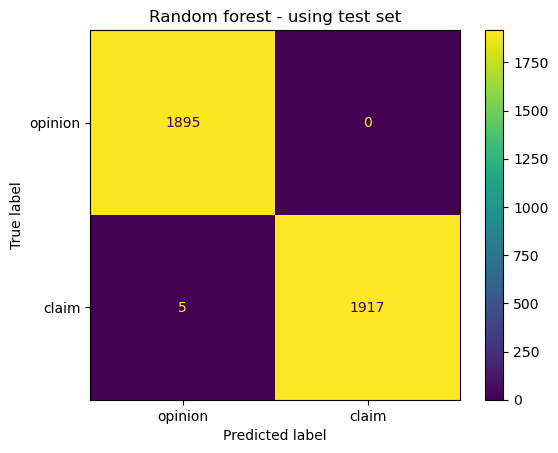

In [71]:
# compute values for confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

# create display of confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['opinion','claim'])

# plot confusion matrix

disp.plot(values_format='')

# display plot

plt.title('Random forest - using test set')
plt.show()

#### Feature importances of champion model

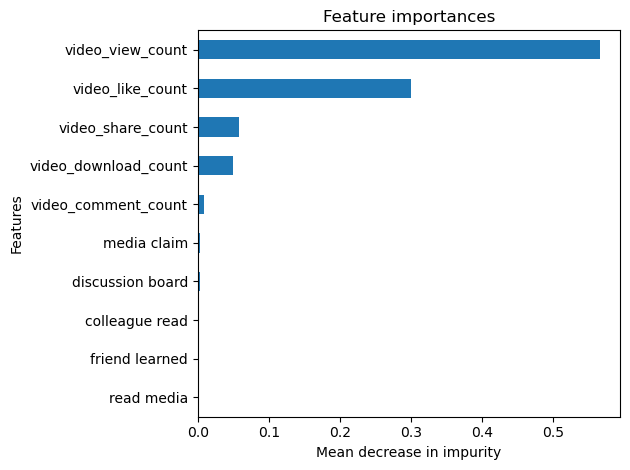

In [72]:
importance = rf_cv.best_estimator_.feature_importances_
rf_importance = pd.Series(importance, index=X_test.columns)

top_10 = rf_importance.sort_values(ascending=False).head(10)

fig, ax = plt.subplots()
top_10.plot(kind='barh',ax=ax)
ax.invert_yaxis()
ax.set_title('Feature importances')
ax.set_xlabel('Mean decrease in impurity')
ax.set_ylabel('Features')
fig.tight_layout()

The most predictive features are all related to engagement levels generated by the video. This is expected, as analysis from prior EDA pointed to this conclusion.

### Conclusion

1. We can recommend this model because it performed well on both validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model successfully classified claims and opinions.
2. The model's most predictive features were related to the user engagement levels associated with each video. It classified videos based on how many views, likes, shares, and downloads they received.
3. It may be helpful to have the number of times the video was reported and the total number of user reports for all videos posted by each author. These two new features may help to improve the model test scores further.